<a href="https://colab.research.google.com/github/Pornwalaifoxall/python_dataviz2024/blob/main/Visualize_Data_Comparison_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import pandas as pd
import os
from datetime import datetime as dt
from datetime import time

In [153]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True) # บังคับให้โหลด data ใหม่มาอีกทีนึง

Mounted at /content/drive


In [154]:
path = '/content/drive/MyDrive/Dataviz_2024_DATA'

In [155]:
data = pd.read_csv(os.path.join(path,'barchart_data.csv'))
data = data.iloc[:,1:]
data.head()

,Year,Quarter,Region,Brand,Price Category,Sales
0,2021,Q1,North America,BrandA,Budget,8270
1,2021,Q1,North America,BrandA,Mid-range,1860
2,2021,Q1,North America,BrandA,Premium,6390
3,2021,Q1,North America,BrandB,Budget,6191
4,2021,Q1,North America,BrandB,Mid-range,6734


In [156]:
# prompt: replace word Budget in the price category with รุ่นเริ่มต้น

data['Price Category'] = data['Price Category'].replace('Budget', 'รุ่นประหยัด')
data['Price Category'] = data['Price Category'].replace('Mid-range', 'รุ่นเริ่มต้น')
data['Price Category'] = data['Price Category'].replace('Premium', 'รุ่นเรือธง')


In [157]:
data

,Year,Quarter,Region,Brand,Price Category,Sales
0,2021,Q1,North America,BrandA,รุ่นประหยัด,8270
1,2021,Q1,North America,BrandA,รุ่นเริ่มต้น,1860
2,2021,Q1,North America,BrandA,รุ่นเรือธง,6390
3,2021,Q1,North America,BrandB,รุ่นประหยัด,6191
4,2021,Q1,North America,BrandB,รุ่นเริ่มต้น,6734
...,...,...,...,...,...,...
475,2022,Q4,Africa,BrandC,รุ่นเริ่มต้น,6486
476,2022,Q4,Africa,BrandC,รุ่นเรือธง,9335
477,2022,Q4,Africa,BrandD,รุ่นประหยัด,5980
478,2022,Q4,Africa,BrandD,รุ่นเริ่มต้น,8266


## Bar chart (กราฟแท่ง)(กราฟผลไม้)

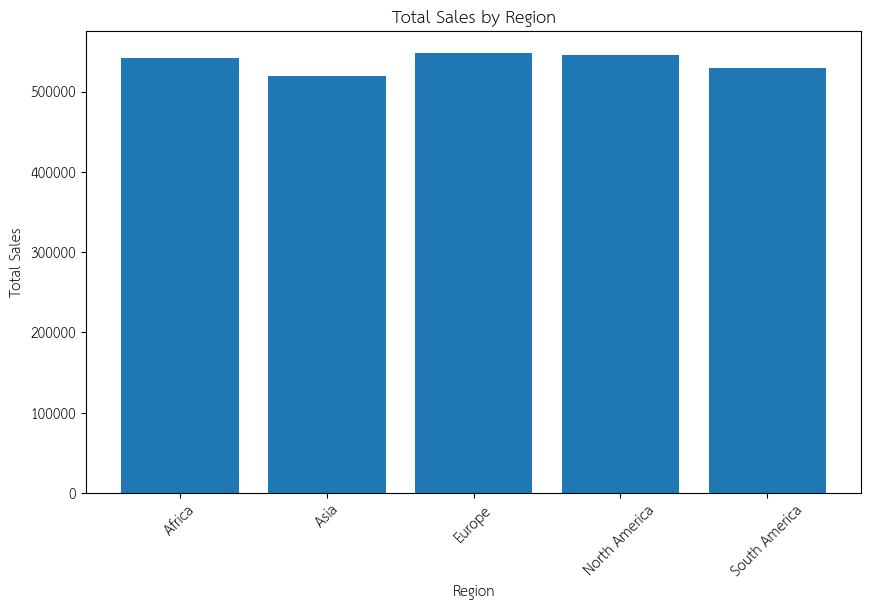

In [158]:
# prompt: plot bar chart เปรียบเทียบปริมาณ sales ทั้งหมดของแต่ละ region

import matplotlib.pyplot as plt

# Group data by region and sum sales
region_sales = data.groupby('Region')['Sales'].sum()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(region_sales.index, region_sales.values)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.show()


In [159]:
region_sales.index

Index(['Africa', 'Asia', 'Europe', 'North America', 'South America'], dtype='object', name='Region')

In [160]:
region_sales

,Sales
Region,
Africa,541556
Asia,519608
Europe,548068
North America,545563
South America,529246


In [161]:
region_sales.reset_index()['Region']

,Region
0,Africa
1,Asia
2,Europe
3,North America
4,South America


In [162]:
region_sales.reset_index().Region

,Region
0,Africa
1,Asia
2,Europe
3,North America
4,South America


In [163]:
region_sales = data.groupby(['Region','Quarter'])['Sales'].sum()
region_sales

Region         Quarter
Africa         Q1         124543
               Q2         144451
               Q3         141602
               Q4         130960
Asia           Q1         123201
               Q2         140369
               Q3         125413
               Q4         130625
Europe         Q1         136996
               Q2         139328
               Q3         141905
               Q4         129839
North America  Q1         130631
               Q2         144435
               Q3         124104
               Q4         146393
South America  Q1         127485
               Q2         138468
               Q3         132925
               Q4         130368
Name: Sales, dtype: int64

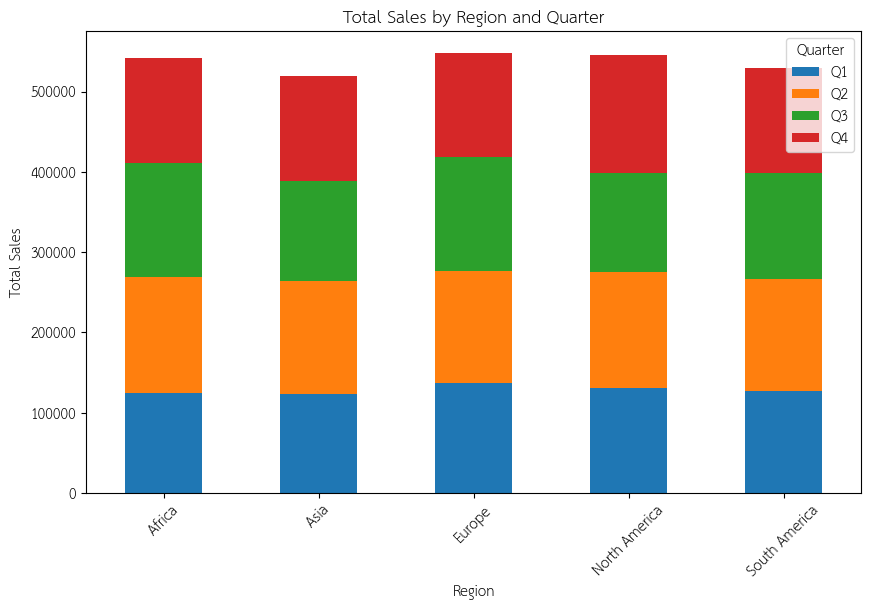

In [164]:
# prompt: สร้าง bar chart เปรียบเทียบปริมาณ sales ทั้งหมดในแต่ละ quarter ของแต่ละ region ด้วย stacked barchart

import pandas as pd
import matplotlib.pyplot as plt

# Group data by region and quarter, then sum sales
region_quarter_sales = data.groupby(['Region', 'Quarter'])['Sales'].sum().unstack()

# Create the stacked bar chart
region_quarter_sales.plot(kind='bar', stacked=True, figsize=(10, 6)) # เป็นคำสั่งของ Pandas

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Quarter')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.show()


## plot stackes barchart ของแต่ละ region โดยดูจาก contribution ของ Price Category

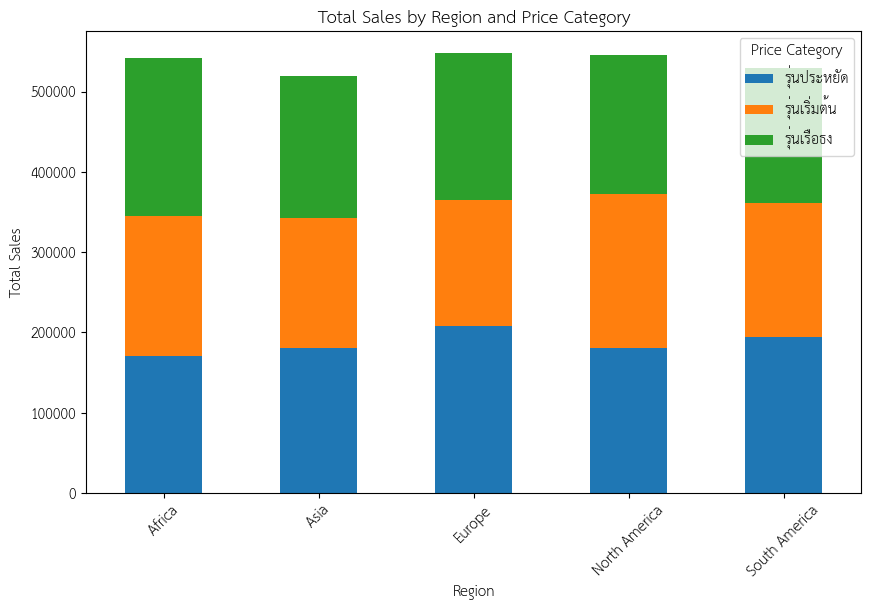

In [165]:
# prompt: plot stackes barchart ของแต่ละ region โดยดูจาก contribution ของ Price Category

# Group data by region and price category, then sum sales
region_price_category_sales = data.groupby(['Region', 'Price Category'])['Sales'].sum().unstack()

# Create the stacked bar chart
region_price_category_sales.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Price Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.show()


การแสดงตัวอักษรภาษาไทยในกราฟ matplotlib
https://medium.com/@kanyawee.work/%E0%B9%81%E0%B8%AA%E0%B8%94%E0%B8%87%E0%B8%9C%E0%B8%A5%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%83%E0%B8%99%E0%B8%81%E0%B8%A3%E0%B8%B2%E0%B8%9F%E0%B8%82%E0%B8%AD%E0%B8%87-matplotlib-%E0%B8%9A%E0%B8%99-google-colab-37210d9a9f31


https://colab.research.google.com/drive/1sTdTZx_Cm51mc8OL_QHtehWyO4725sGl#scrollTo=Ak9SbVd5L7U8

In [166]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [167]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

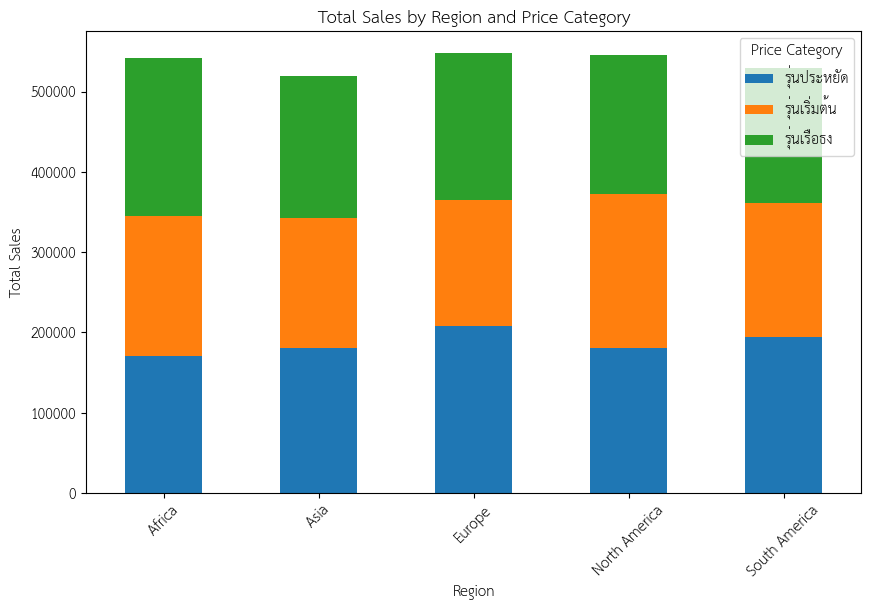

In [168]:
# prompt: plot stackes barchart ของแต่ละ region โดยดูจาก contribution ของ Price Category

# Group data by region and price category, then sum sales
region_price_category_sales = data.groupby(['Region', 'Price Category'])['Sales'].sum().unstack()

# Create the stacked bar chart
region_price_category_sales.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Price Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.show()

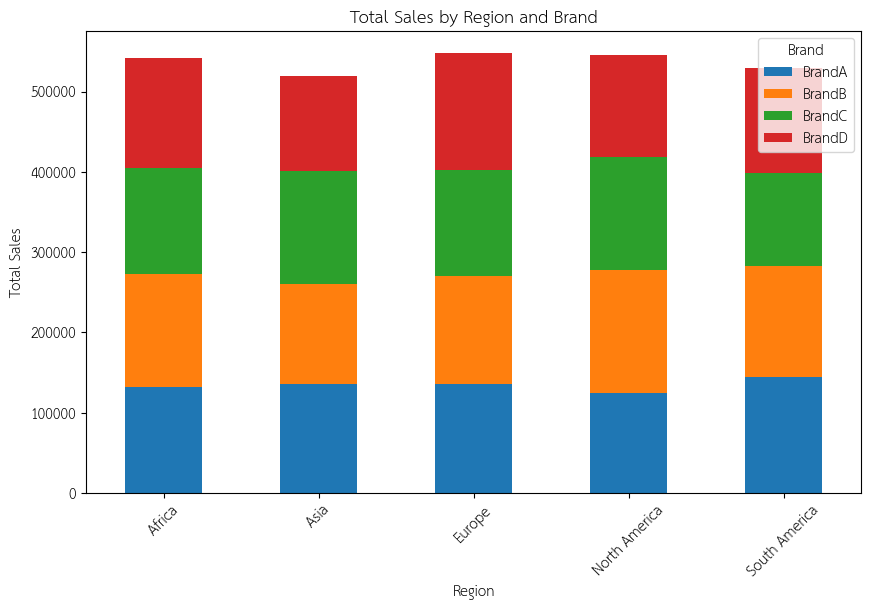

In [169]:
# prompt: plot stackes barchart ของแต่ละ region โดยดูจาก contribution ของ ฺBrand

# Group data by region and brand, then sum sales
region_brand_sales = data.groupby(['Region', 'Brand'])['Sales'].sum().unstack()

# Create the stacked bar chart
region_brand_sales.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Brand')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.show()


## plot stacked barchart ด้วย matplotlib

In [170]:
region_brand_sales = data.groupby(['Region', 'Brand'])['Sales'].sum().unstack()
region_brand_sales

Brand,BrandA,BrandB,BrandC,BrandD
Region,,,,
Africa,132019,140187,132273,137077
Asia,136205,124678,139677,119048
Europe,135638,135069,131700,145661
North America,124810,153135,140802,126816
South America,144169,138543,115774,130760


In [171]:
region_brand_sales['BrandA'].values

array([132019, 136205, 135638, 124810, 144169])

In [172]:
region_brand_sales.index

Index(['Africa', 'Asia', 'Europe', 'North America', 'South America'], dtype='object', name='Region')

## plot ส่วนแรก

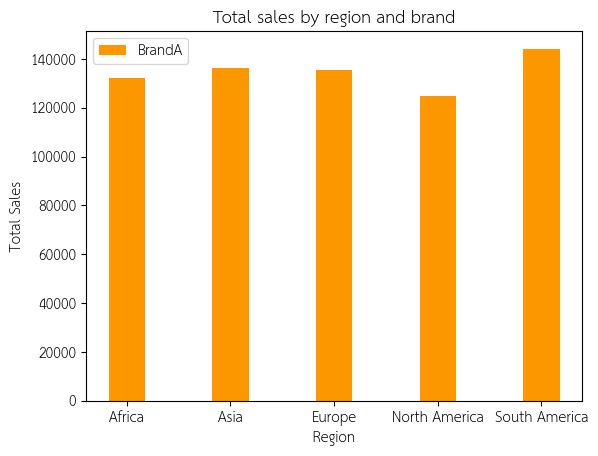

In [173]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_brand_sales.index,region_brand_sales['BrandA'].values, width,
       label='BrandA',color = '#fc9700')
#ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#19038a')

ax.set_ylabel(' Total Sales ')
ax.set_xlabel(' Region ')
ax.set_title('Total sales by region and brand')
ax.legend()

plt.show()

## plot ส่วนที่ 2

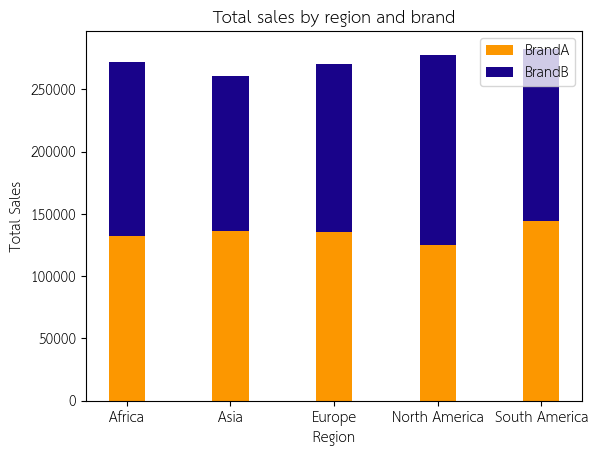

In [174]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_brand_sales.index,region_brand_sales['BrandA'].values, width, label='BrandA',color = '#fc9700')
ax.bar(region_brand_sales.index,region_brand_sales['BrandB'].values, width, bottom=region_brand_sales['BrandA'].values,
       label='BrandB',color = '#19038a')
#ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#19038a')

ax.set_ylabel(' Total Sales ')
ax.set_xlabel(' Region ')
ax.set_title('Total sales by region and brand')
ax.legend()

plt.show()

# plot ส่วนที่ 3

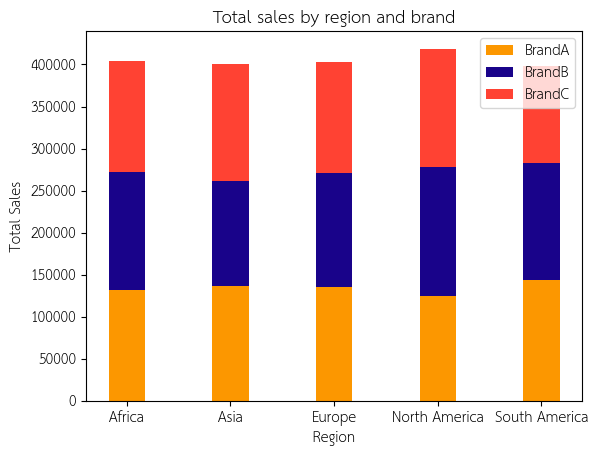

In [175]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_brand_sales.index,region_brand_sales['BrandA'].values, width, label='BrandA',color = '#fc9700')
ax.bar(region_brand_sales.index,region_brand_sales['BrandB'].values, width, bottom=region_brand_sales['BrandA'].values,
       label='BrandB',color = '#19038a')
ax.bar(region_brand_sales.index,region_brand_sales['BrandC'].values, width, bottom=region_brand_sales['BrandA'].values+region_brand_sales['BrandB'].values,
       label='BrandC',color = '#ff4233')
ax.set_ylabel(' Total Sales ')
ax.set_xlabel(' Region ')
ax.set_title('Total sales by region and brand')
ax.legend()

plt.show()

## plot ส่วนที่ 4

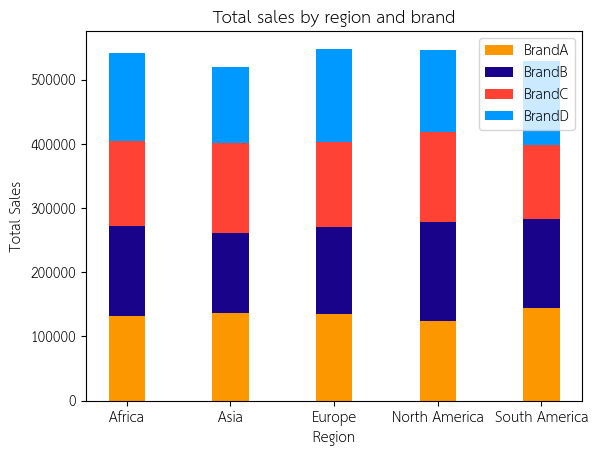

In [176]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_brand_sales.index,region_brand_sales['BrandA'].values, width, label='BrandA',color = '#fc9700')
ax.bar(region_brand_sales.index,region_brand_sales['BrandB'].values, width, bottom=region_brand_sales['BrandA'].values,
       label='BrandB',color = '#19038a')
ax.bar(region_brand_sales.index,region_brand_sales['BrandC'].values, width, bottom=region_brand_sales['BrandA'].values+region_brand_sales['BrandB'].values,
       label='BrandC',color = '#ff4233')
ax.bar(region_brand_sales.index,region_brand_sales['BrandD'].values, width, bottom=region_brand_sales['BrandA'].values+region_brand_sales['BrandB'].values+region_brand_sales['BrandC'].values,
       label='BrandD',color = '#0099ff')
ax.set_ylabel(' Total Sales ')
ax.set_xlabel(' Region ')
ax.set_title('Total sales by region and brand')
ax.legend()

plt.show()

## Grouped Bar Chart (เปรียบเทียบในกลุ่ม)

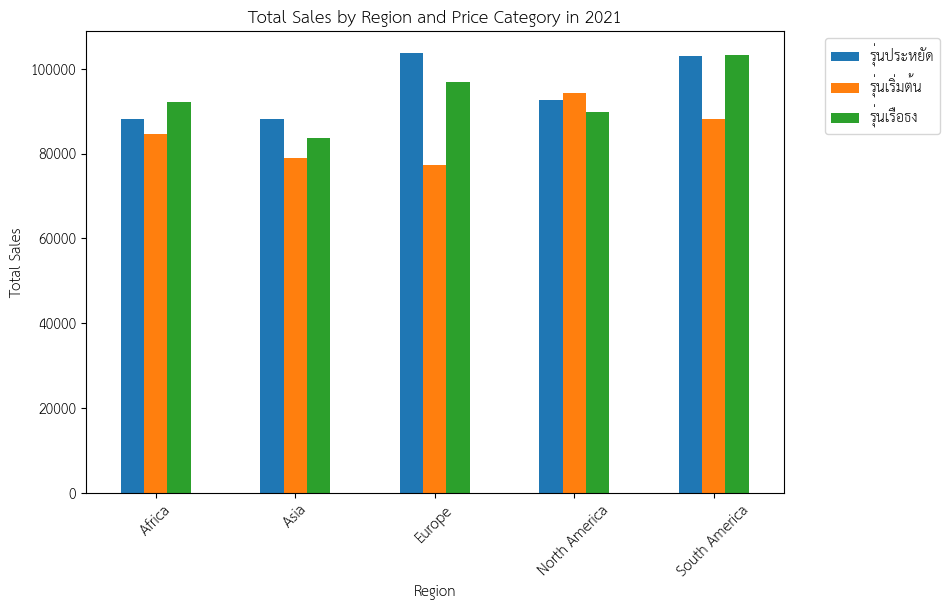

In [177]:
# prompt: plot grouped bar chart ของแต่ละ region ในปี 2021 เพื่อเปรียบเทียบ sales ของแต่ละ Price Category ย้าย legend ออกไปข้างนอกกราฟ

# Group data by region, year, and price category, then sum sales
region_year_price_category_sales = data[data['Year'] == 2021].groupby(['Region', 'Price Category'])['Sales'].sum().unstack()

# Create the grouped bar chart
ax = region_year_price_category_sales.plot(kind='bar', figsize=(9, 6))

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Price Category in 2021')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Move the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the chart
plt.show()


## plot grouped bar chart ของหนังอินเดียโดยแยกกลุ่มตามประเภทหนัง และเปรียบเทียบ Rating จาก ความยาวของหนัง

In [194]:
file_path = '/content/drive/MyDrive/Dataviz_2024_DATA'

In [195]:
data_india = pd.read_csv(os.path.join(file_path, 'IMDb Movies India.csv'), encoding='latin-1') # Check file name for typos and correct spacing
data_india.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [196]:
# Clean data
data_india['Year'] = data_india['Year'].str.replace('(', '').str.replace(')', '')
data_india['Duration'] = data_india['Duration'].str.replace('min', '')
data_india.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [198]:
def split_genres(row):
  # Check if the genre value is a string before splitting
  if isinstance(row['Genre'], str):
    genres = row['Genre'].split(',')
    return [genre.strip() for genre in genres]
  else:
    # Handle cases where the genre is not a string (e.g., return an empty list or NaN)
    return []

data_india['Genre'] = data_india.apply(split_genres, axis=1)

In [200]:
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive
import os

# Function to split genres and create new rows
def split_genres(row):
  if isinstance(row['Genre'], list):
    new_rows = []
    for i in range(len(row['Genre'])):
      new_row = row.copy()
      new_row['Genre'] = row['Genre'][i]
      new_rows.append(new_row)
    return new_rows
  else:
    return [row]

# Apply the function to split genres and create new rows
new_md = pd.concat([pd.DataFrame(split_genres(row)) for _, row in data_india.iterrows()], ignore_index=True)

In [201]:
new_md.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90,Drama,NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Homecoming,2021,90,Musical,NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
4,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor


In [204]:
new_md = new_md.dropna(subset=['Rating','Year'])

In [205]:
new_md['Genre'].value_counts()

,count
Genre,
Drama,4924
Action,2358
Romance,1781
Comedy,1609
Crime,1111
Thriller,876
Family,663
Musical,498
Adventure,386


In [236]:
# กรองข้อมูลใน DataFrame new_md เพื่อเลือกเฉพาะแถวที่คอลัมน์ 'Genre' มีค่าอยู่ในรายการ selected_genres
selected_genres = ['Drama', 'Action', 'Romance', 'Comedy', 'Crime']
filtered_data = new_md[new_md['Genre'].isin(selected_genres)]
filtered_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
4,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
7,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
8,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
23066,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
23067,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
23068,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
23071,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [235]:
# การจัดกลุ่มช่วงปี
def categorize_year(year):
  if 1917 <= year <= 1951:
    return '1917 - 1951'
  elif 1952 <= year <= 1986:
    return '1952 - 1986'
  else:
    return '1987 - 2021'

# Apply the function to create a new column 'Year Category'
filtered_data['Year Category'] = pd.to_numeric(filtered_data['Year']).apply(categorize_year)
filtered_data

<ipython-input-235-6952afe74927>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year Category'] = pd.to_numeric(filtered_data['Year']).apply(categorize_year)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Year Category,Duration Category
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,1987 - 2021,medium
4,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,1987 - 2021,medium
5,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,1987 - 2021,medium
7,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,1987 - 2021,medium
8,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,1987 - 2021,medium
...,...,...,...,...,...,...,...,...,...,...,...,...
23066,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,1987 - 2021,high
23067,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,1987 - 2021,medium
23068,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,1987 - 2021,medium
23071,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,1987 - 2021,medium


In [227]:
group_year_data = filtered_data.groupby(['Genre','Year Category'])['Genre'].count().unstack()
group_year_data

Year Category,1917 - 1951,1952 - 1986,1987 - 2021
Genre,,,
Action,10,702,1646
Comedy,12,396,1201
Crime,5,292,814
Drama,171,1654,3099
Romance,61,650,1070


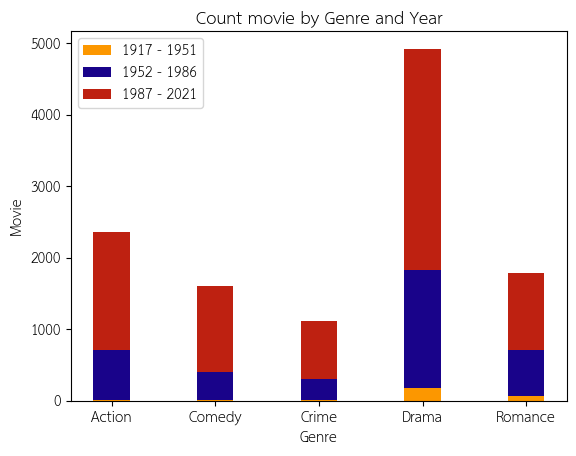

In [228]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(group_year_data.index, group_year_data['1917 - 1951'].values, width,
       label='1917 - 1951',color = '#fc9700')
ax.bar(group_year_data.index, group_year_data['1952 - 1986'].values, width,
       bottom=group_year_data['1917 - 1951'].values,
       label = '1952 - 1986',color = '#19038a')
ax.bar(group_year_data.index, group_year_data['1987 - 2021'].values, width,
       bottom=group_year_data['1917 - 1951'].values+group_year_data['1952 - 1986'].values,
       label = '1987 - 2021',color = '#be2111')
ax.set_ylabel('Movie')
ax.set_xlabel('Genre')
ax.set_title('Count movie by Genre and Year')
ax.legend()

plt.show()

In [233]:
# สร้างฟังก์ชันเพื่อแบ่งประเภทระยะเวลาของภาพยนตร์
def categorize_duration(duration):
  if duration < 90:
    return 'short'
  elif 90 <= duration <= 150:
    return 'medium'
  else:
    return 'high'

# ใช้ฟังก์ชันที่กำหนดไว้เพื่อสร้างคอลัมน์ใหม่ในข้อมูล
filtered_data['Duration Category'] = pd.to_numeric(
    filtered_data['Duration']).apply(categorize_duration)

<ipython-input-233-45e0d0c91e78>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Duration Category'] = pd.to_numeric(


In [234]:
# DataFrame ใหม่ที่สร้างขึ้นจากการจัดกลุ่มข้อมูลความยาวของภาพยนตร์ในแต่ละช่วงปี
group = filtered_data.groupby(
    ['Year Category','Duration Category'])['Duration Category'].count().unstack()
group

Duration Category,high,medium,short
Year Category,,,
1917 - 1951,140,114,5
1952 - 1986,2020,1667,7
1987 - 2021,3031,4555,244


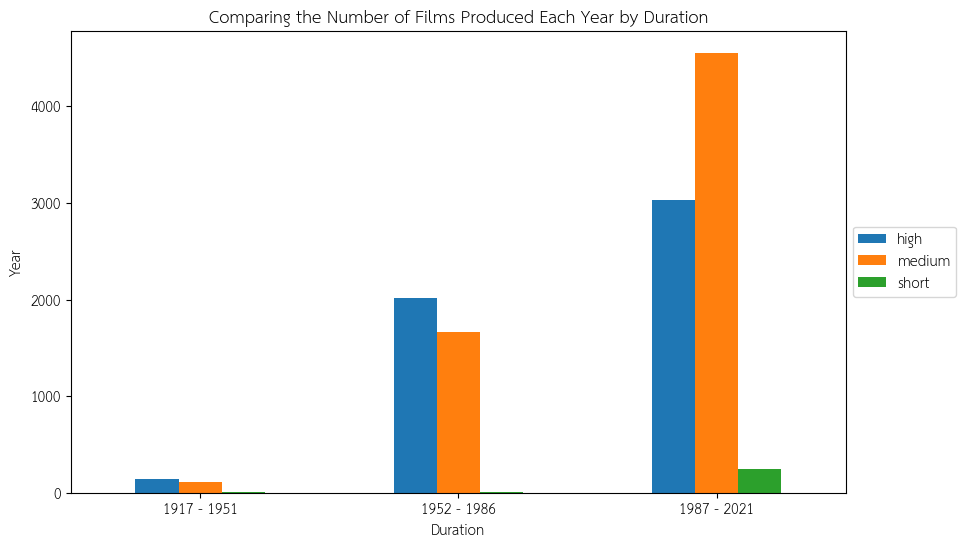

In [232]:
# สร้าง group bar chart
group.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.ylabel('Year')
plt.xlabel('Duration')
plt.title('Comparing the Number of Films Produced Each Year by Duration')

plt.xticks(rotation=0)

# Move the legend outside the graph
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Display the chart
plt.show()